In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.datasets import load_breast_cancer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Download the Dataset

In [2]:
# Load the Breast Cancer dataset
data = load_breast_cancer()

In [3]:
# Convert to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [4]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimete

In [5]:
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoo

In [6]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


# Step 2: Data Preparation

### Step 2.1: Handle missing values (if any)

In [7]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### Step 2.2: Feature scaling

In [8]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_imputed.drop('target', axis=1)), columns=data.feature_names)

In [9]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

### Step 2.3 Add the target column back to the scaled dataframe

In [10]:
df_scaled = X_scaled.copy()
df_scaled['target'] = df_imputed['target']

# Step 3: Feature Selection

#### Feature selection using SelectKBest

In [11]:
k = 10  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_scaled, df_scaled['target'])

In [12]:
with open('selector.pkl', 'wb') as selector_file:
    pickle.dump(selector, selector_file)

#### Get the selected feature names

In [13]:
selected_features = X_scaled.columns[selector.get_support()]
print(f"Selected {k} features:")
print(selected_features)

Selected 10 features:
Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


#### Create a new DataFrame with selected features

In [14]:
df_selected = pd.DataFrame(X_selected, columns=selected_features)
df_selected['target'] = df_imputed['target']

#### Correlation Heatmap of the Selected Features

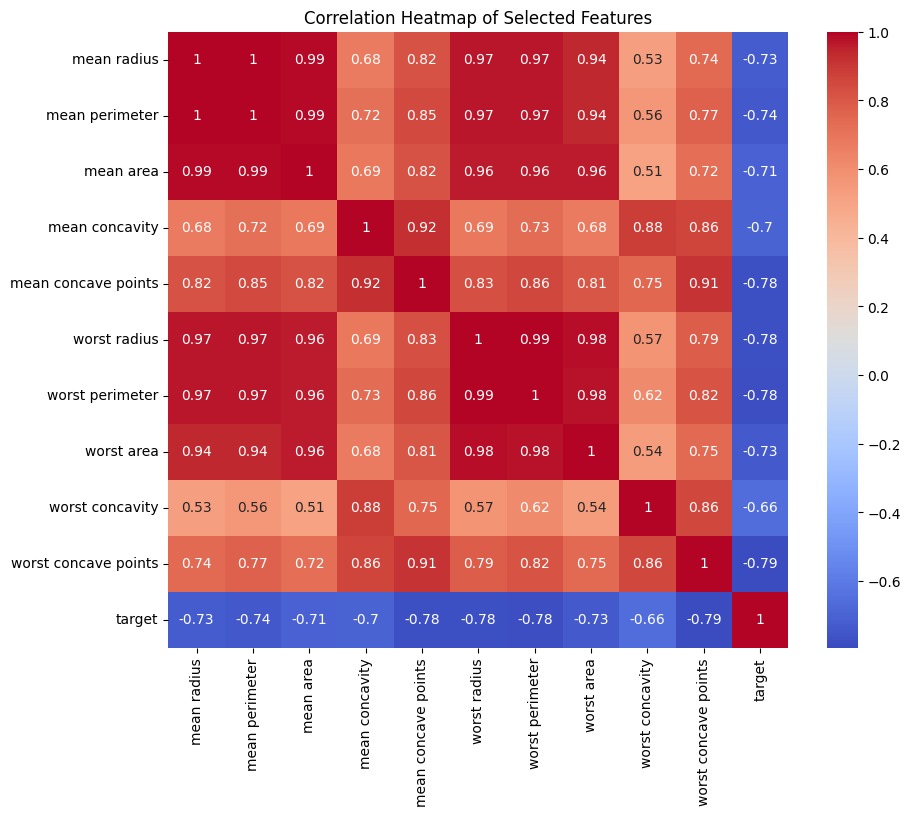

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

#### Pairplot of Selected Features

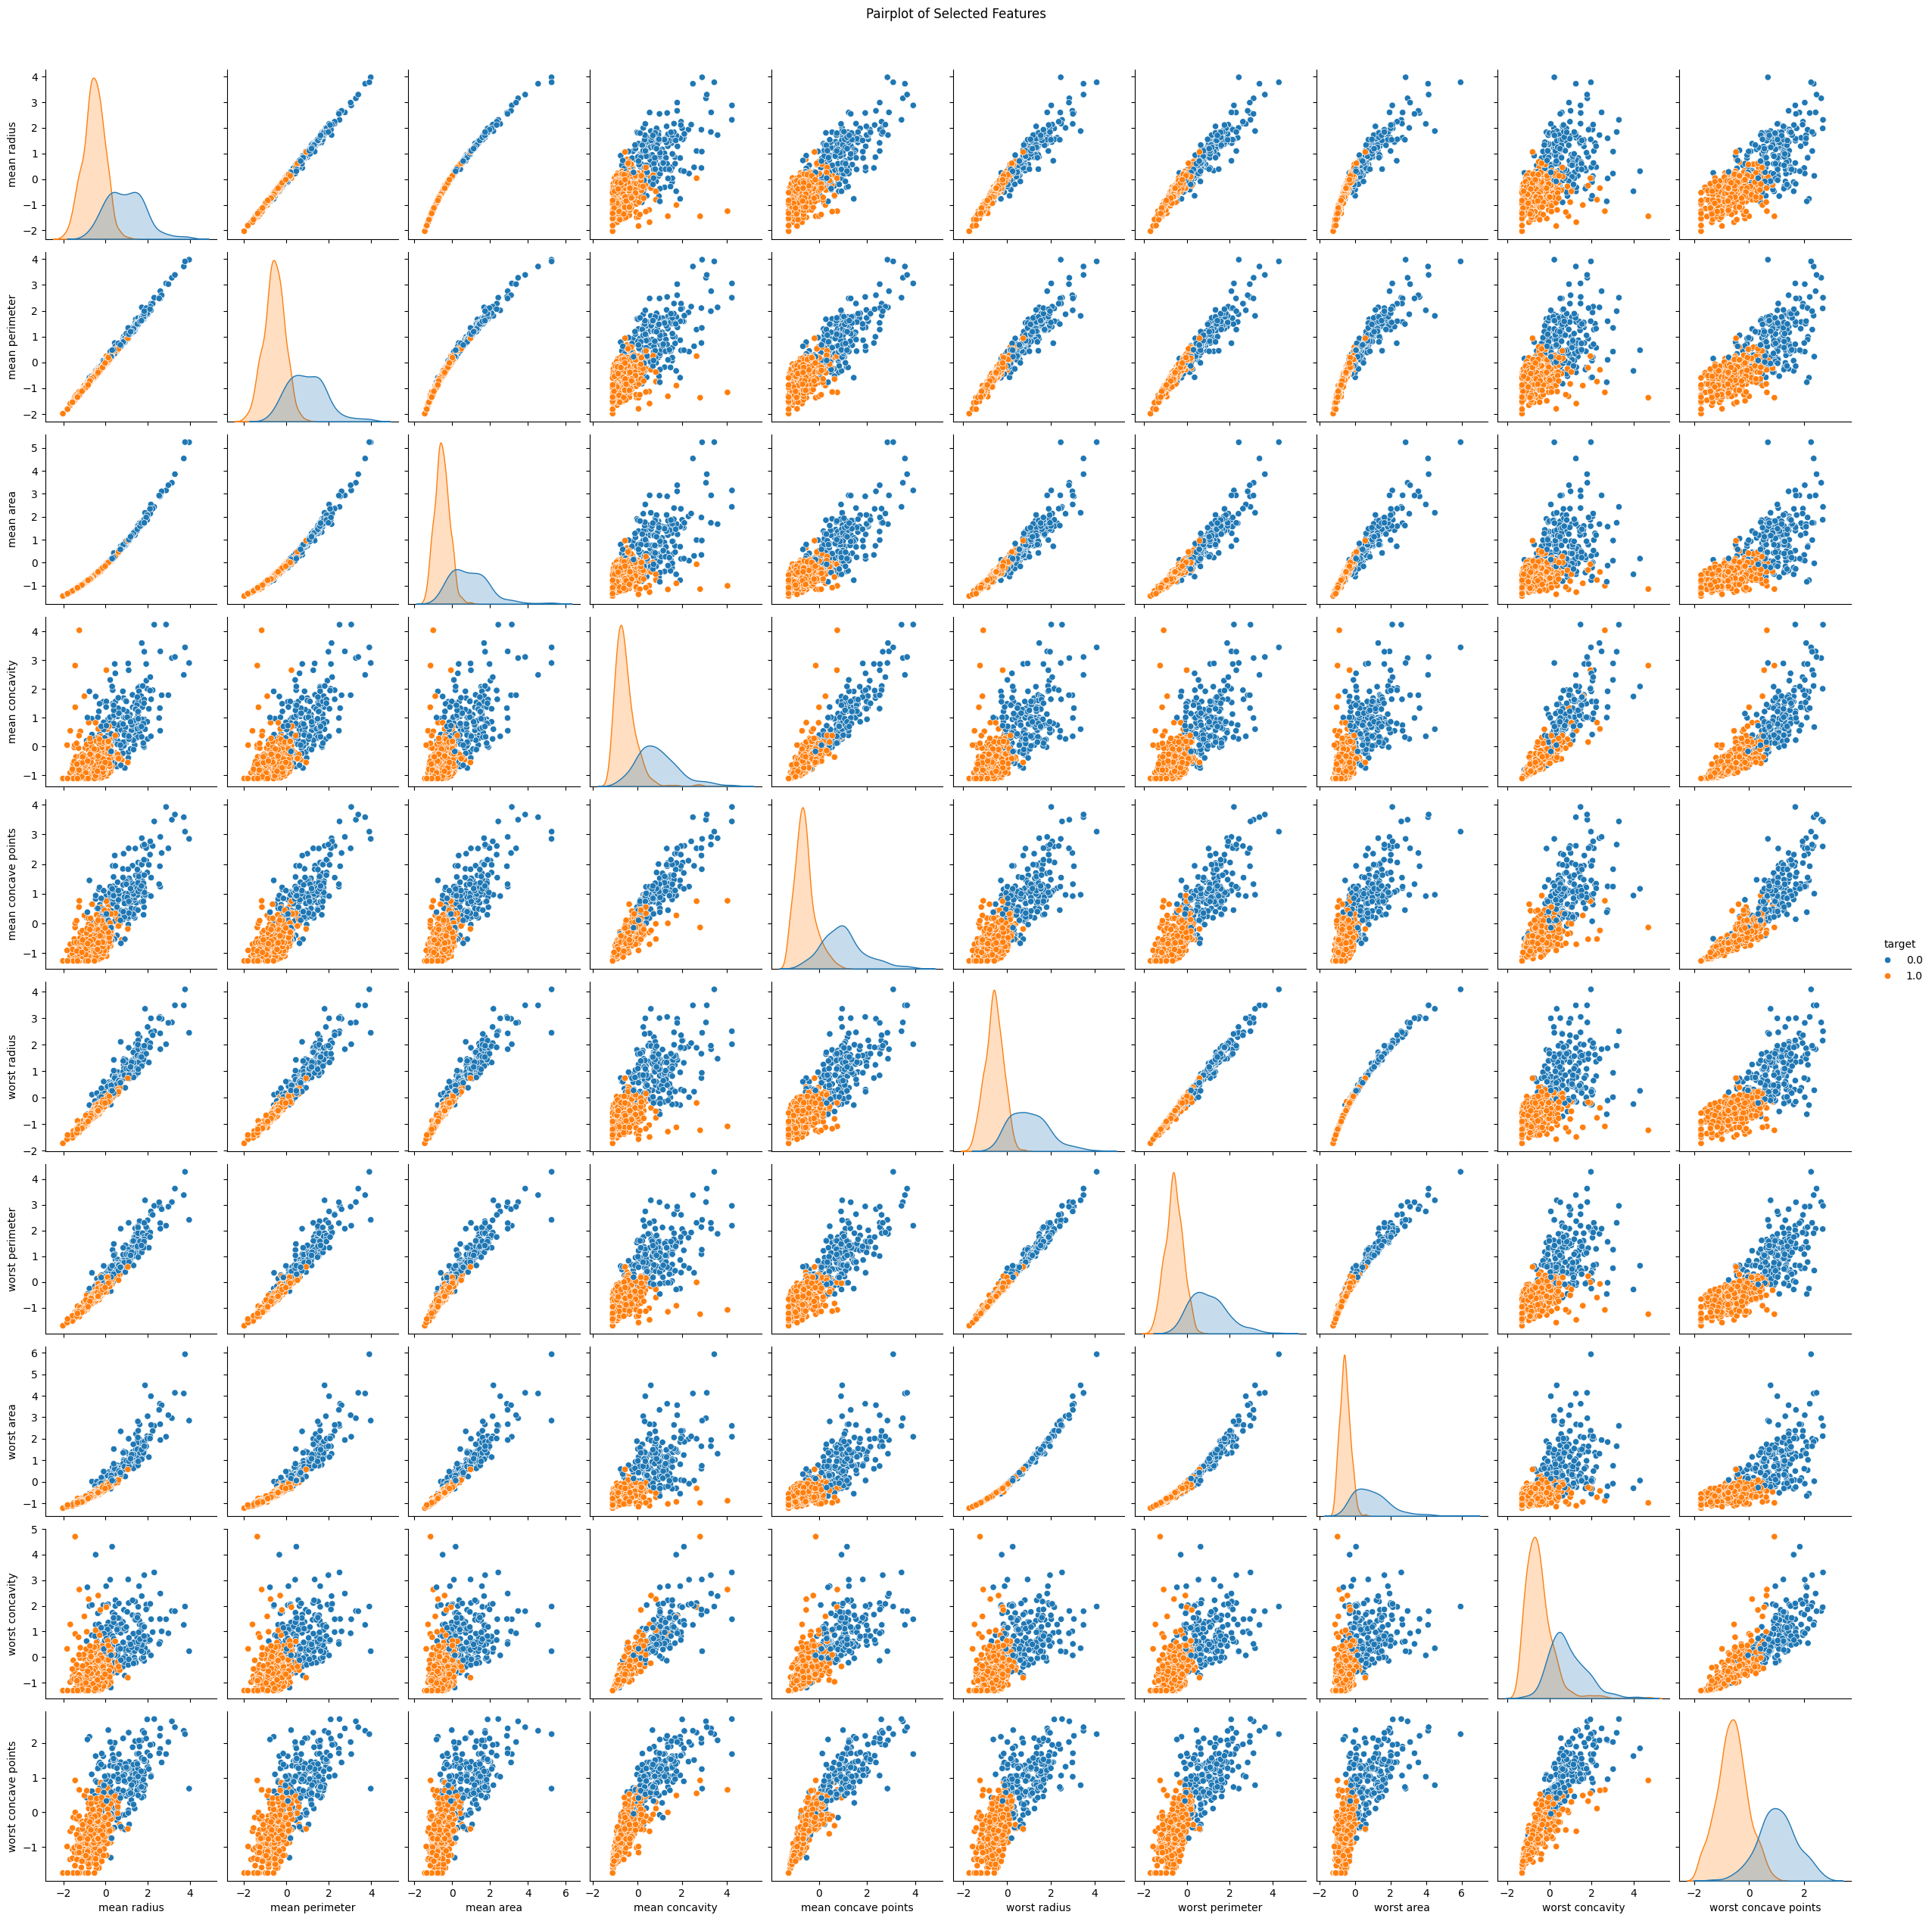

In [16]:
sns.pairplot(df_selected, hue='target')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Step 4: Grid Search CV for Model Tuning

#### Split the dataset into training and testing sets

In [17]:
X = df_selected.drop('target', axis=1)
y = df_selected['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100,), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

In [19]:
# Set up the GridSearchCV
grid_search = GridSearchCV(MLPClassifier(max_iter=1000), param_grid, n_jobs=-1, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50), (100,), (100, 100)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

In [20]:
print("Grid Search completed. Best parameters found:")
print(grid_search.best_params_)

Grid Search completed. Best parameters found:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}


# Step 5: Implementing an Artificial Neural Network (ANN) Model

In [21]:
# Create an ANN model using the best parameters
best_params = grid_search.best_params_
ann_model = MLPClassifier(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    solver=best_params['solver'],
    alpha=best_params['alpha'],
    learning_rate=best_params['learning_rate'],
    max_iter=1000
)

# Train the model
ann_model.fit(X_train, y_train)

y_pred_train = ann_model.predict(X_train)
y_pred_test = ann_model.predict(X_test)

print("Training accuracy: ", accuracy_score(y_train, y_pred_train))
print("Testing accuracy: ", accuracy_score(y_test, y_pred_test))
print("\nClassification report:\n", classification_report(y_test, y_pred_test))


Training accuracy:  0.957286432160804
Testing accuracy:  0.9649122807017544

Classification report:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.95        63
         1.0       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



#### Confusion Matrix

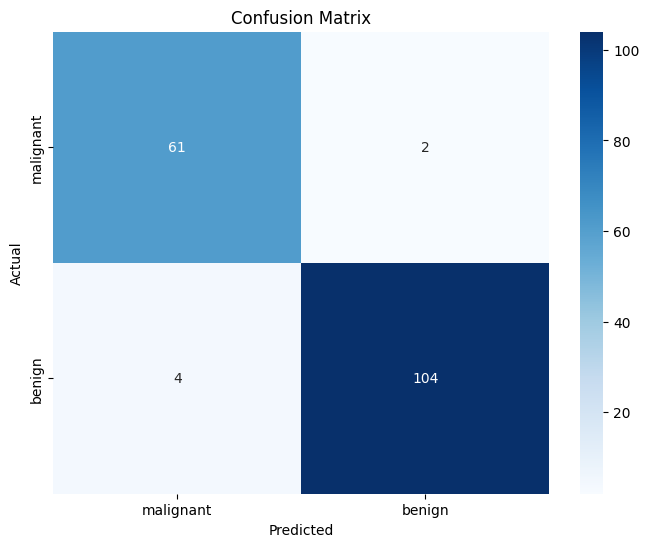

In [22]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Feature Importance (based on SelectKBest scores)

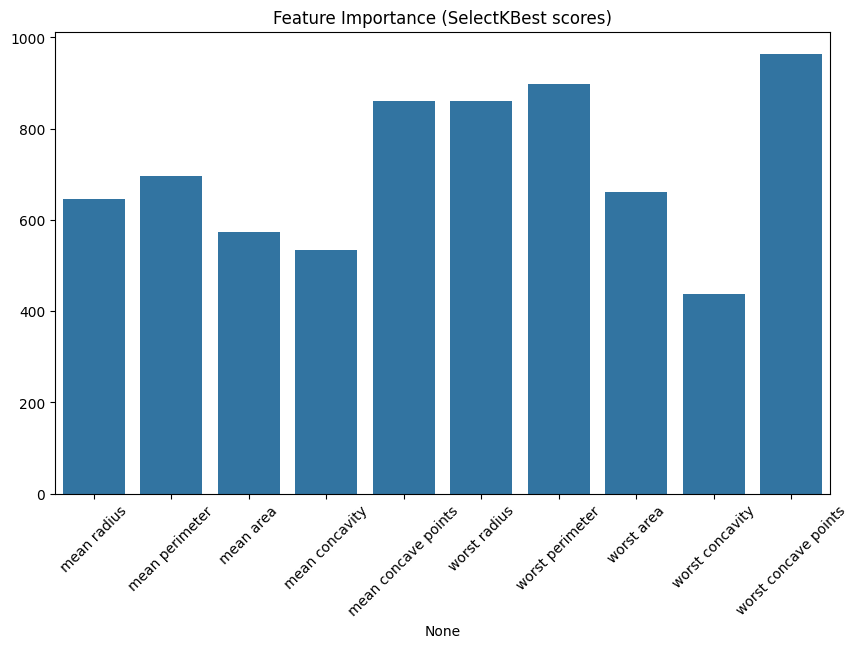

In [23]:
feature_scores = selector.scores_[selector.get_support()]
plt.figure(figsize=(10, 6))
sns.barplot(x=selected_features, y=feature_scores)
plt.title('Feature Importance (SelectKBest scores)')
plt.xticks(rotation=45)
plt.show()

#### Save the model

In [24]:
# Save the model and selected features
with open('ann_model.pkl', 'wb') as model_file:
    pickle.dump(ann_model, model_file)
with open('selected_features.pkl', 'wb') as features_file:
    pickle.dump(selected_features, features_file)